<a href="https://colab.research.google.com/github/vgorbikov/infotransfer_labs/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание

Для соответствующих сигналов $U$, матрицы смешения $A$ и матрицы разделения $W$
построить входные реализации $X$ и восстановленные реализации $Y$.\
Для количественной оценки эффективности разделителя вычислить глобальный индекс отклонения матрицы $P$ = $\{p_{ij}\}$ = $WA$:

$$
J = \sum_{i=1}^m (\sum_{j=1}^m \frac{|p_{ij}|}{\max|p_{ik}|} - 1) +
\sum_{j=1}^m (\sum_{i=1}^m \frac{|p_{ij}|}{\max|p_{ki}|} - 1)
$$

## Вариант 8

$U_0(n) = A \sin(2 \pi n f_0/f_s) + A \cos(2\pi nf_1/f_s + \pi/12)$\
$U_1(n) \sim U(-1;1)$\
$U_2(n) \sim N(0;0.1)$

$$
A = \begin{pmatrix}
-0.907 & -1.521 & 0.36 \\
1.175 & -1.566 & -0.866 \\
1.548 & 1.49 & 1.431
\end{pmatrix}
$$

$$
W = \begin{pmatrix}
-1.396 & 3.888 & 2.688 \\
-0.695 & -0.574 & -0.155 \\
5.984 & -1.414 & 4.614
\end{pmatrix}
$$

где $f_0$ = 3 Гц, $f_1$ = 19 Гц, $f_s$ = 10 кГц, $A$ = 0.1; \
$N(0; 0.1)$ – нормально распределенная случайная
величина с $m$ = 0 и $\sigma$ = 0.1; \
$U(−1; 1)$ – равномерно распределенная случайная величина в
промежутке $[−1; 1]$

## Теория

Случайный выходной вектор $U(n)$ определяется следующим образом:
$$
U = [U_1, U_2, ..., U_m]^T
$$
где $m$ компонентов вектора выбираются из множества независимых источников. Аргумент $n$ обозначает дискретное время.

Вектор $U$ применяется к линейной системе, характеристики отображения входа на выход которой задаются несингулярной матрицей $A$ размерности $m \times m$, называемой матрицей смешения. Результатом является вектор наблюдений $X(n)$ размерности $m \times 1$, связанный с вектором $U$ следующим соотношением:
$$
X = AU
$$
где
$$
X = [X_1, X_2, ..., X_m]^T
$$

Для данного вектора $X$ задача сводится к поиску разделяющей матрицы $W$ такой, что исходный вектор $U$ может быть получен из выходного вектора $Y$, определяемого следующим образом:
$$
Y = WX
$$
где
$$
Y = [Y_1, Y_2, ..., Y_m]^T
$$


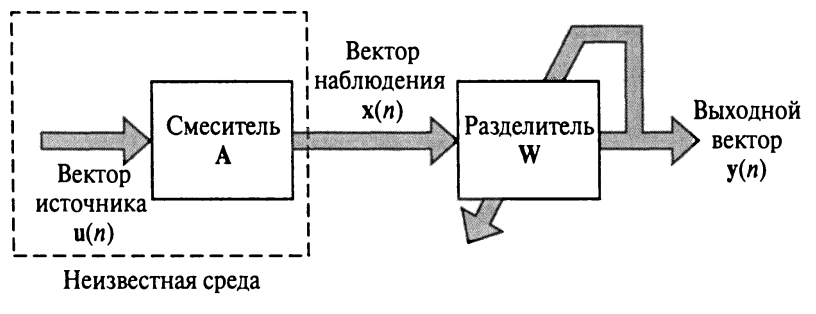

Качество разделенияможно оценить с помощью глобального индекса отклонения матрицы $P = WA$

## Решение

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Зафиксируем состояние генератора рандомных чисел
np.random.seed(33)

In [14]:
# Условия задачи
A = np.array(
    [[-0.907, -1.521, 0.36],
    [1.175, -1.566, -0.866],
    [1.548, 1.49, 1.431]])

W = np.array(
    [[-1.396, 3.888, 2.688],
     [-0.695, -0.574, -0.155],
     [5.984, -1.414, 4.614]])

f_0 = 3000
f_1 = 19000
f_s = 10000
a = 0.1

In [15]:
def U0(n, f_0 = f_0, f_1 = f_1, f_s = f_s, a = a):
  """
  Сигнал 0
  """
  return a*np.sin(2*np.pi*n *f_0/f_s) + a*np.cos(2*np.pi*n*f_1/f_s + np.pi/12)


def U1(count):
  """
  Сигнал 1
  """
  return np.random.uniform(-1.0, 1.0, count)


def U2(count):
  """
  Сигнал 2
  """
  return np.random.normal(0, 0.1, count)

In [16]:
# Генерируем отсчёты
steps = np.arange(0, 2, 0.01)

# Вычисляем значения исходных сигналов в точках отсчёта
US = np.zeros((3, len(steps)))

US[0] = [U0(s) for s in steps]
US[1] = U1(len(steps))
US[2] = U2(len(steps))

In [28]:
def deviation_index(w: np.array, a: np.array) -> float:
  """
  Рассчёт глобального индекса отклонения
  """
  p = np.dot(w, a)
  n = len(p)
  j = np.sum([np.sum([abs(p[i][j])/np.max(p[i]) for j in range(n)]) - 1 for i in range(n)])
  j += np.sum([np.sum([abs(p[i][j])/np.max([c[j] for c in p]) for i in range(n)]) - 1 for j in range(n)])

  return j




def signal_mixing(A: np.array, signals: tuple[list[float]]) -> np.array:
  """
  Получение смешанных сигналов
  """
  samples_n = len(signals[0])
  signals_count = len(signals)

  XS = np.zeros((signals_count, samples_n))

  for n in range(samples_n):
    u = np.array([signals[i][n] for i in range(signals_count)])
    x = A @ u
    for i in range(signals_count):
      XS[i][n] = x[i]

  return XS



def signal_separation(W: np.array, x_signals: tuple[list[float]]) -> np.array:
  """
  Разделение смешанных сигналов
  """
  # То же самое, только с другими входными данными :)
  return signal_mixing(W, x_signals)

In [19]:
# Полчаем смешанные сигналы
XS = signal_mixing(A, US)
# Восстанавливаем исходные сигналы из смешанных
YS = signal_separation(W, XS)

Глобальный индекс отклонения: 0.26100559385308264


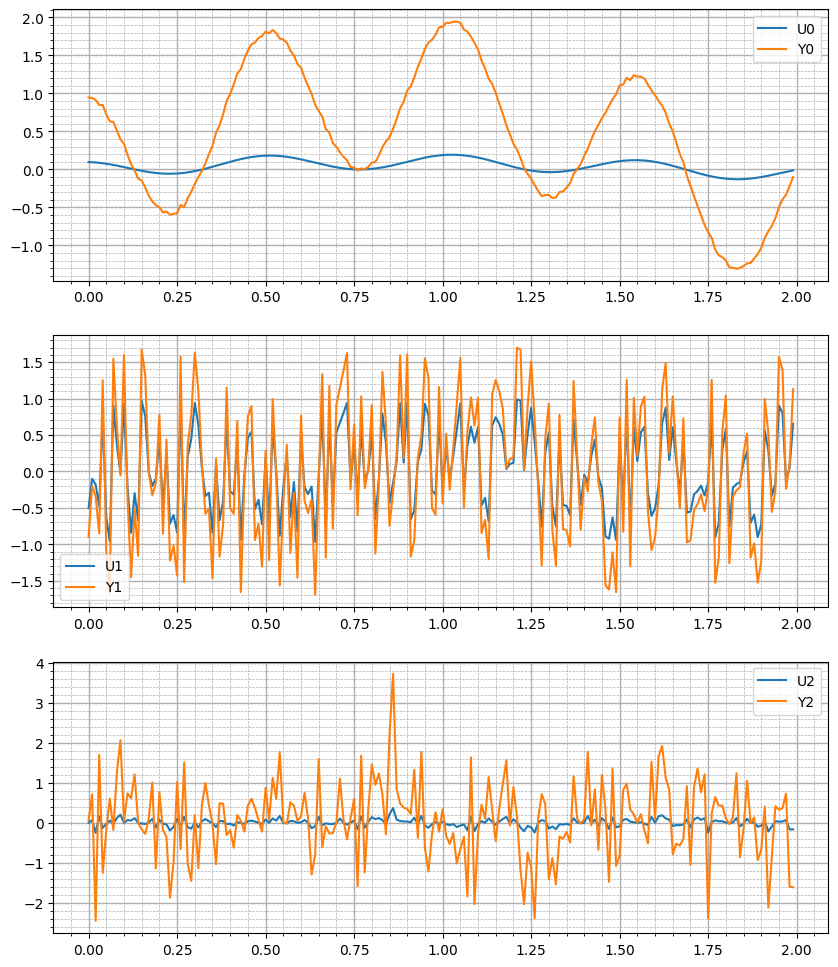

In [29]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

axs[0].plot(steps, US[0], label='U0')
axs[0].plot(steps, YS[0], label='Y0')

axs[1].plot(steps, US[1], label='U1')
axs[1].plot(steps, YS[1], label='Y1')

axs[2].plot(steps, US[2], label='U2')
axs[2].plot(steps, YS[2], label='Y2')

for ax in axs:
  ax.minorticks_on()
  ax.grid(visible=True, which='major', linewidth=1)
  ax.grid(visible=True, which='minor', linestyle='--', linewidth=0.5)
  ax.legend()

print(f'Глобальный индекс отклонения: {deviation_index(W, A)}')